# Import

In [11]:
! pip install category_encoders

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
! pip install eli5

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import model_preprocessing as mp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import category_encoders
from category_encoders.one_hot import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import eli5

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [14]:
df = pd.read_csv('verlander.csv')
df.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (131) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,pitch_type,game_date,index,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,stand,p_throws,home_team,away_team,type,bb_type,inning_topbot,sv_id,if_fielding_alignment,score_diff,on_1b_id,ball_high,ball_low,ball_left,ball_right,bases_loaded,batter_swung,in_strikezone,chased,fastball_perc_faced,fastball_chase_perc,fastball_bip_swung_perc,fastball_taken_strike_perc,fastball_est_woba,fastball_babip,fastball_iso_value,breaking_perc_faced,breaking_chase_perc,breaking_bip_swung_perc,breaking_taken_strike_perc,breaking_est_woba,breaking_babip,breaking_iso_value,offspeed_perc_faced,offspeed_chase_perc,offspeed_bip_swung_perc,offspeed_taken_strike_perc,offspeed_est_woba,offspeed_babip,offspeed_iso_value,pitchout_perc_faced,balls,strikes,player_name,events,description,des,pitch_name,of_fielding_alignment,_count,count_cat,pitch_cat,overall_FF_perc,count_cat_FF_perc,overall_SL_perc,count_cat_SL_perc,overall_CU_perc,count_cat_CU_perc,overall_CH_perc,count_cat_CH_perc,overall_FC_perc,count_cat_FC_perc,overall_FT_perc,count_cat_FT_perc,pitch_count,L1_pitch_type,L1_pitch_result,L1_pitch_zone,L5_FF_perc,L5_strike_perc,L5_SL_perc,L5_CU_perc,L5_CH_perc,L5_FC_perc,batting_order_slot,pitcher_AB
0,1510,FF,2018-03-29,22730,94.6,-1.9486,6.8034,592261.0,434378.0,8.0,NaN,2018.0,-0.8339,1.6529,0.2748,1.7070,0.0,0.0,0.0,0.0,1.0,NaN,NaN,435263.0,7.4453,-136.8952,-10.8637,-11.8856,32.3168,-9.8095,3.3339,1.4562,NaN,NaN,NaN,92.490,2652.0,5.498,529411.0,55.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,R,R,TEX,HOU,S,NaN,Bot,180329_195119,Standard,1.0,NaN,False,False,False,False,0,0,1,0,66.241684,21.138212,42.05021,40.0,0.300159,0.220395,0.098684,26.995565,27.516779,36.70213,43.915344,0.231478,0.2,0.054545,6.76275,36.231884,21.666666,33.962265,0.426231,0.25,0.041667,0.0,0,0,Justin Verlander,NaN,called_strike,NaN,4-Seam Fastball,Standard,0,neutral,fastball,0.583272,0.685385,0.215498,0.163427,0.151046,0.114471,0.039606,0.029518,0.007626,0.005040,0.002952,0.002160,1,FF,first pitch,-1.0,56.076277,54.250162,24.676794,16.305753,2.60181,0.339367,1,False
1,1511,FF,2018-03-29,22711,94.3,-1.9916,6.6522,592261.0,434378.0,14.0,NaN,2018.0,-1.2892,1.4338,0.4047,1.2020,0.0,0.0,0.0,0.0,1.0,NaN,NaN,435263.0,8.9916,-136.5666,-11.4425,-18.0155,31.9642,-12.0415,3.3446,1.4668,NaN,NaN,NaN,93.284,2638.0,6.095,529411.0,54.4034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,R,R,TEX,HOU,B,NaN,Bot,180329_195137,Standard,1.0,NaN,False,True,False,False,0,0,0,0,66.241684,21.138212,42.05021,40.0,0.300159,0.220395,0.098684,26.995565,27.516779,36.70213,43.915344,0.231478,0.2,0.054545,6.76275,36.231884,21.666666,33.962265,0.426231,0.25,0.041667,0.0,0,1,Justin Verlander,NaN,ball,NaN,4-Seam Fastball,Standard,1,ahead,fastball,0.583272,0.493105,0.215498,0.257727,0.151046,0.198288,0.039606,0.039467,0.007626,0.008084,0.002952,0.003329,2,FF,S,8.0,56.076277,54.250162,24.676794,16.305753,2.60181,0.339367,1,False
2,1512,SL,2018-03-29,22699,86.4,-2.1580,6.5734,592261.0,434378.0,14.0,NaN,2018.0,0.2707,0.3526,1.5138,-0.0429,0.0,0.0,0.0,0.0,1.0,NaN,NaN,435263.0,8.0583,-125.1452,-10.0136,1.1868,24.5998,-26.8457,3.3339,1.4562,NaN,NaN,NaN,84.944,2680.0,5.543,529411.0,54.9560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,R,R,TEX,HOU,B,NaN,Bot,180329_195201,Standard,1.0,NaN,False,True,False,True,0,0,0,0,66.241684,21.138212,42.05021,40.0,0.300159,0.220395,0.098684,26.995565,27.516779,36.70213,43.915344,0.231478,0.2,0

# Clean

In [15]:
processor = mp.Preprocess(dataframe = df)
df = processor.process(processor.df)
df.head()

,release_speed,on_3b,on_2b,on_1b,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,stand,p_throws,inning_topbot,score_diff,ball_high,ball_low,ball_left,ball_right,bases_loaded,batter_swung,in_strikezone,chased,fastball_perc_faced,fastball_chase_perc,fastball_bip_swung_perc,fastball_taken_strike_perc,fastball_est_woba,fastball_babip,fastball_iso_value,breaking_perc_faced,breaking_chase_perc,breaking_bip_swung_perc,breaking_taken_strike_perc,breaking_est_woba,breaking_babip,breaking_iso_value,offspeed_perc_faced,offspeed_chase_perc,offspeed_bip_swung_perc,offspeed_taken_strike_perc,offspeed_est_woba,offspeed_babip,offspeed_iso_value,pitchout_perc_faced,overall_FF_perc,count_cat_FF_perc,overall_SL_perc,count_cat_SL_perc,overall_CU_perc,count_cat_CU_perc,overall_CH_perc,count_cat_CH_perc,overall_FC_perc,count_cat_FC_perc,overall_FT_perc,count_cat_FT_perc,L5_FF_perc,L5_strike_perc,L5_SL_perc,L5_CU_perc,L5_CH_perc,L5_FC_perc,pitcher_AB,next_pitch,events_field_out,events_strikeout,events_walk,events_hit_by_pitch,events_triple,events_home_run,events_single,events_double,events_double_play,events_force_out,events_sac_fly,events_field_error,events_grounded_into_double_play,events_strikeout_double_play,events_sac_bunt,events_pickoff_2b,events_catcher_interf,zone_8.0,zone_14.0,zone_5.0,zone_3.0,zone_6.0,zone_9.0,zone_2.0,zone_12.0,zone_11.0,zone_4.0,zone_7.0,zone_1.0,zone_13.0,pitch_type_FF,pitch_type_SL,pitch_type_CH,pitch_type_CU,pitch_type_FC,type_S,type_B,type_X,home_team_TEX,home_team_HOU,home_team_CWS,home_team_ARI,home_team_LAA,home_team_NYY,home_team_OAK,home_team_TB,home_team_LAD,home_team_DET,home_team_BAL,home_team_SEA,home_team_MIN,home_team_CIN,home_team_CLE,away_team_HOU,away_team_BAL,away_team_TEX,away_team_NYY,away_team_SF,away_team_BOS,away_team_TB,away_team_TOR,away_team_CWS,away_team_OAK,away_team_DET,away_team_SEA,away_team_COL,away_team_LAA,away_team_MIN,away_team_ARI,away_team_MIL,pitch_count_1.0,pitch_count_2.0,pitch_count_3.0,pitch_count_4.0,pitch_count_34.0,pitch_count_35.0,pitch_count_36.0,pitch_count_37.0,pitch_count_66.0,pitch_count_67.0,pitch_count_68.0,pitch_count_69.0,pitch_count_70.0,pitch_count_5.0,pitch_count_42.0,pitch_count_43.0,pitch_count_44.0,pitch_count_45.0,pitch_count_79.0,pitch_count_80.0,pitch_count_81.0,pitch_count_71.0,pitch_count_72.0,pitch_count_73.0,pitch_count_38.0,pitch_count_39.0,pitch_count_84.0,pitch_count_85.0,pitch_count_86.0,pitch_count_32.0,pitch_count_33.0,pitch_count_64.0,pitch_count_65.0,pitch_count_102.0,pitch_count_103.0,pitch_count_104.0,pitch_count_105.0,pitch_count_46.0,pitch_count_47.0,pitch_count_82.0,pitch_count_83.0,pitch_count_99.0,pitch_count_6.0,pitch_count_7.0,pitch_count_8.0,pitch_count_9.0,pitch_count_41.0,pitch_count_40.0,pitch_count_51.0,pitch_count_52.0,pitch_count_53.0,pitch_count_75.0,pitch_count_101.0,pitch_count_30.0,pitch_count_31.0,pitch_count_54.0,pitch_count_55.0,pitch_count_90.0,pitch_count_91.0,pitch_count_92.0,pitch_count_93.0,pitch_count_94.0,pitch_count_95.0,pitch_count_96.0,pitch_count_76.0,pitch_count_77.0,pitch_count_100.0,pitch_count_87.0,pitch_count_88.0,pitch_count_48.0,pitch_count_89.0,pitch_count_74.0,pitch_count_63.0,pitch_count_49.0,pitch_count_78.0,pitch_count_50.0,pitch_count_97.0,pitch_count_98.0,pitch_count_56.0,pitch_count_57.0,pitch_count_58.0,pitch_count_10.0,pitch_count_59.0,pitch_count_60.0,pitch_count_61.0,pitch_count_62.0,pitch_count_107.0,pitch_count_108.0,pitch_count_109.0,pitch_count_110.0,pitch_count_11.0,pitch_count_12.0,pitch_count_13.0,pitch_count_14.0,pitch_count_106.0,pitch_count_111.0,pitch_count_112.0,pitch_count_15.0,pitch_count_16.0,pitch_count_17.0,pitch_count_18.0,pitch_count_19.0,pitch_count_20.0,pitch_count_21.0,pitch_count_22.0,pitch_count_23.0,pitch_count_24.0,pitch_count_25.0,pitch_count_113.0,pitch_count_114.0,pitch_count_26.0,pitch_count_27.0,pitch_count_28.0,pitch_count_29.0,pitch_count_115.0,pitch_count_116.0,pitch_count_117.0,pitch_count_118.0,pitch_count_119.0,pitch_count_120.0,pitch

# Create Feature Matrix and Target Vector

In [16]:
feature_matrix = df.drop(columns = ['next_pitch'])
target_vector = df['next_pitch']

feature_matrix.shape, target_vector.shape

((6188, 328), (6188,))

# Train Test Split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(feature_matrix, target_vector)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4641, 328), (1547, 328), (4641,), (1547,))

# Instantiate Model

[GBC Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [104]:
clf = Pipeline(steps = [('scaler', RobustScaler()),
                        ('boost', GradientBoostingClassifier(

                        ))])


params = {
    'boost__max_depth': [3, 4, 5, 6]
}


grid = GridSearchCV(
    estimator = clf,
    scoring = 'balanced_accuracy',
    param_grid = params,
    refit = True,
    cv = 10,
    verbose = 10,
    n_jobs = -1)

# Train Model

In [105]:
grid.fit(x_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done  14 out of  40 | elapsed:   42.9s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  19 out of  40 | elapsed:  1.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  24 out of  40 | elapsed:  1.4min remaining:   58.0s
[Parallel(n_jobs=-1)]: Done  29 out of  40 | elapsed:  1.7min remaining:   38.1s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:  2.2min remaining:   22.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('boost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_n...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'boost__max_depth': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='balanced_accuracy', verbose=10)

In [106]:
pd.DataFrame(grid.cv_results_).sort_values(by = 'mean_test_score', ascending = False).head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, *

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_boost__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,26.567694,0.284906,0.037654,0.000873,3,{'boost__max_depth': 3},0.287035,0.279888,0.283331,0.360608,0.273550,0.271993,0.280244,0.271196,0.269432,0.244650,0.282242,0.028384,1,0.627883,0.627232,0.628776,0.636408,0.636073,0.637595,0.632645,0.644569,0.638595,0.638510,0.634829,0.005307
1,40.403468,0.323393,0.040075,0.001350,4,{'boost__max_depth': 4},0.284754,0.276086,0.285717,0.255429,0.282138,0.283087,0.249064,0.268642,0.266116,0.256186,0.270752,0.012936,2,0.764016,0.750588,0.769034,0.762137,0.751769,0.758017,0.761097,0.773312,0.762496,0.760273,0.761274,0.006565
3,60.859139,7.756752,0.029799,0.005143,6,{'boost__max_depth': 6},0.273758,0.280299,0.283691,0.264949,0.269590,0.273083,0.257759,0.267327,0.262399,0.273340,0.270634,0.007519,3,0.949577,0.951012,0.960156,0.959916,0.952818,0.955694,0.957460,0.951869,0.960402,0.957791,0.955669,0.003869
2,57.462540,0.533507,0.040895,0.004911,5,{'boost__max_depth': 5},0.285472,0.284357,0.269387,0.256218,0.281510,0.271924,0.250803,0.281629,0.259686,0.262992,0.270421,0.011958,4,0.871643,0.877361,0.882493,0.875073,0.872098,0.873982,0.876709,0.881413,0.880365,0.882231,0.877337,0.003911


# Evaluate Model

In [107]:
model = grid.best_estimator_
model

Pipeline(memory=None,
     steps=[('scaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('boost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_n...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

In [108]:
accuracy_score(model.predict(x_train), y_train)

0.7015729368670545

In [109]:
df['next_pitch'].value_counts(normalize = True)

FF    0.560763
SL    0.246768
CU    0.163058
CH    0.026018
FC    0.003394
Name: next_pitch, dtype: float64

In [110]:
pd.Series(model.predict(x_train)).value_counts(normalize = True)

FF    0.749192
SL    0.189399
CU    0.046757
CH    0.011420
FC    0.003232
dtype: float64

In [111]:
importances = eli5.explain_weights_df(model, feature_names = feature_matrix.columns)
importances = importances.sort_values(by = 'weight', ascending = False)
importances.head()

,feature,weight,std
0,pitch_type_FF,0.065076,0.048500
1,type_X,0.063845,0.047406
2,pitch_type_SL,0.059862,0.065720
3,events_strikeout,0.054204,0.043259
4,type_S,0.036341,0.040771


In [112]:
bad_feats = importances[importances['weight'] < 0.0001]

bad_feats['feature'].tolist()

['events_double',
 'pitch_count_4.0',
 'batting_order_slot_4',
 'away_team_NYY',
 'batting_order_slot_2',
 'ball_right',
 '_count_22.0',
 'pitch_count_44.0',
 'pitch_count_115.0',
 'zone_6.0',
 'pitch_count_88.0',
 'zone_1.0',
 'pitch_count_95.0',
 'batting_order_slot_pitcher',
 'pitch_count_32.0',
 'away_team_ARI',
 'pitch_count_65.0',
 'pitch_count_105.0',
 'pitch_count_2.0',
 'pitch_count_1.0',
 'pitch_count_82.0',
 'pitch_count_16.0',
 'pitch_count_114.0',
 'events_triple',
 'pitch_count_15.0',
 'events_sac_fly',
 'pitch_count_58.0',
 'zone_8.0',
 'events_catcher_interf',
 'events_pickoff_2b',
 'events_sac_bunt',
 'pitch_count_80.0',
 'events_double_play',
 'pitch_count_112.0',
 'events_single',
 'pitch_count_116.0',
 'pitch_count_109.0',
 'pitch_count_110.0',
 'pitcher_AB',
 'pitch_count_111.0',
 'away_team_LAA',
 'home_team_DET',
 'away_team_COL',
 'strikes_0.0',
 'pitch_count_122.0',
 'batting_order_slot_6',
 'inning_1.0',
 'L1_pitch_type_SL',
 'batting_order_slot_5',
 'L1_pitch

In [113]:
eli5.show_weights(model, feature_names = feature_matrix.columns)

Weight,Feature
0.0651 ± 0.0970,pitch_type_FF
0.0638 ± 0.0948,type_X
0.0599 ± 0.1314,pitch_type_SL
0.0542 ± 0.0865,events_strikeout
0.0363 ± 0.0815,type_S
0.0335 ± 0.1636,release_speed
0.0280 ± 0.1028,fastball_bip_swung_perc
0.0211 ± 0.1474,L5_CU_perc
0.0181 ± 0.1108,at_bat_number
0.0171 ± 0.1064,fastball_chase_perc


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


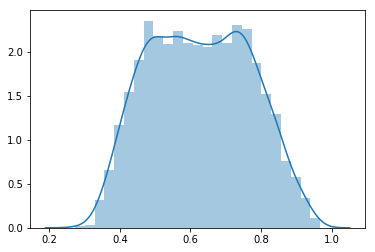

In [114]:
model_probabilities = model.predict_proba(x_train)

Model_Prediction_Probability = []

for _ in range(len(x_train)):
    x = max(model_probabilities[_])
    Model_Prediction_Probability.append(x) 

sns.distplot(Model_Prediction_Probability)
plt.show();

In [115]:
accuracy_score(model.predict(x_test), y_test)

0.5830639948287007

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

          CH       1.00      0.45      0.62       118
          CU       0.82      0.24      0.38       729
          FC       1.00      1.00      1.00        15
          FF       0.70      0.92      0.79      2623
          SL       0.67      0.51      0.58      1156

   micro avg       0.70      0.70      0.70      4641
   macro avg       0.84      0.63      0.67      4641
weighted avg       0.72      0.70      0.67      4641



In [117]:
labels = sorted(df['next_pitch'].value_counts().index.tolist())

con_matrix = pd.DataFrame(confusion_matrix(y_train, model.predict(x_train)),
                         index = labels,
                         columns = labels)

con_matrix

,CH,CU,FC,FF,SL
CH,53,3,0,53,9
CU,0,178,0,458,93
FC,0,0,15,0,0
FF,0,16,0,2420,187
SL,0,20,0,546,590


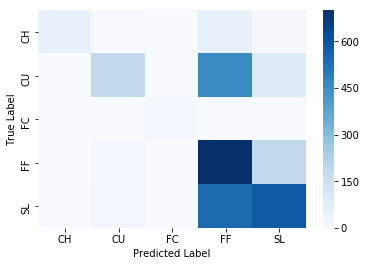

In [118]:
sns.heatmap(
    data = confusion_matrix(y_train, model.predict(x_train)),
    cmap = 'Blues',
    vmin = 0,
    vmax = 700,
    xticklabels = labels,
    yticklabels = labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show();